In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import (KNeighborsClassifier,
                               NeighborhoodComponentsAnalysis)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sn

In [31]:
### Predicting popularity based on not quantiled cuts
## Optimal number of neighbors = 500

n_neighbors = 500

train = pd.read_csv('~/Box/DSCI303/archive/final_year_train.csv')
test = pd.read_csv('~/Box/DSCI303/archive/final_year_test.csv')

drop_columns = ['Unnamed: 0', 'Unnamed: 0.1', 'explicit', 'key', 'id', 'duration_ms', 'year',
                 'year_bins','mode', 'popularity_cut', 'release_date', 'artists', 'name', 'popularity']
train = train.drop(drop_columns, axis =1)

features = ['acousticness', 'danceability', 'energy', 'instrumentalness',
        'loudness', 'speechiness', 'tempo','valence', 'liveness']
# target = ['year_bins']
# target = ['popularity_cut']
target = ['popularity_qcut']

X_train = train[features]
X_test = test[features]

y_train = train[target]
y_test = test[target]


n_classes = 4

<ipython-input-32-5b1812d69a93>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train)


0.5406391619092461


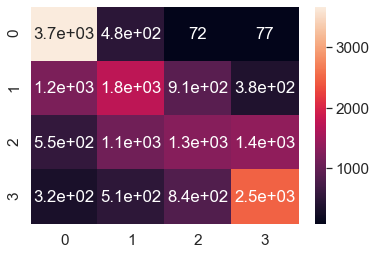

In [32]:
knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights='distance')

knn.fit(X_train, y_train)

# Compute the nearest neighbor accuracy on the embedded test set
acc_knn = knn.score(X_test, y_test)

print(acc_knn)

df_cm = confusion_matrix(y_test, knn.predict(X_test))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True) # font size

plt.show()

In [22]:
### Predicting popularity based on quantiled cuts
## Optimal number of neighbors = 50

n_neighbors = 100

train = pd.read_csv('~/Box/DSCI303/archive/final_year_train.csv')
test = pd.read_csv('~/Box/DSCI303/archive/final_year_test.csv')

drop_columns = ['Unnamed: 0', 'Unnamed: 0.1', 'explicit', 'key', 'id', 'duration_ms', 'year',
                 'year_bins','mode', 'popularity_qcut', 'release_date', 'artists', 'name', 'popularity']
train = train.drop(drop_columns, axis =1)

features = ['acousticness', 'danceability', 'energy', 'instrumentalness',
        'loudness', 'speechiness', 'tempo','valence', 'liveness']
# target = ['year_bins']
target = ['popularity_cut']
# target = ['popularity_qcut']

X_train = train[features]
X_test = test[features]

y_train = train[target]
y_test = test[target]

<ipython-input-23-b84b9868e6a3>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train)


0.6522276499323171


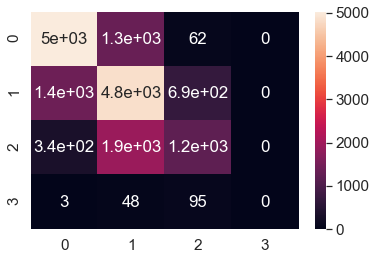

In [23]:
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

knn.fit(X_train, y_train)

# Compute the nearest neighbor accuracy on the embedded test set
acc_knn = knn.score(X_test, y_test)

print(acc_knn)

df_cm = confusion_matrix(y_test, knn.predict(X_test))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True) # font size

plt.show()

In [ ]:
n_neighbors = 500

train = pd.read_csv('~/Box/DSCI303/archive/final_year_train.csv')
test = pd.read_csv('~/Box/DSCI303/archive/final_year_test.csv')

drop_columns = ['Unnamed: 0', 'Unnamed: 0.1', 'explicit', 'key', 'id', 'duration_ms', 'year',
                 'popularity_cut','mode', 'popularity_qcut', 'release_date', 'artists', 'name', 'popularity']
train = train.drop(drop_columns, axis =1)

features = ['acousticness', 'danceability', 'energy', 'instrumentalness',
        'loudness', 'speechiness', 'tempo','valence', 'liveness']
target = ['year_bins']
# target = ['popularity_cut']
# target = ['popularity_qcut']

X_train = train[features]
X_test = test[features]

y_train = train[target]
y_test = test[target]

In [ ]:
knn = KNeighborsClassifier(n_neighbors=n_neighbors ,weight='distance')

knn.fit(X_train, y_train)

# Compute the nearest neighbor accuracy on the embedded test set
acc_knn = knn.score(X_test, y_test)

print(acc_knn)

df_cm = confusion_matrix(y_test, knn.predict(X_test))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True) # font size

plt.show()

<ipython-input-34-b84b9868e6a3>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train)


0.6192101700900476
